### Data Description

VanArsdel is a company that manufactures and sells sporting goods. The company has offices in the United States (US) and several other countries. Its sales comprise of US sales and International sales. VanArsdel’s sales come from its owned manufactured products, as well as other manufacturers’ products. 

Bobby is a district manager who is responsible for several districts over two States for the VanArsdel's US office. He just sent you his district's sales transactions for the year 2015 up to the end of June, in form of a CSV file. Bobby would like you to help him perform some analysis on his districts. Specifically, he would like to know:

Which of his districts performs the best and the worst in the period?

Which of the cities have the most sales and which of them have the least sales?

How are the product categories performing overall in his districts?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv("Lab3.csv",parse_dates=['Date'])

In [3]:
df

,ProductID,Date,Zip,Units,Revenue,City,State,Region,District,Country,Manufacturer,Product,Category,Segment
0,580,2015-01-02,78758,1,834.4875,"Austin, TX, USA",TX,Central,District #23,USA,VanArsdel,Maximus UC-45,Urban,Convenience
1,559,2015-01-02,76209,1,629.9475,"Denton, TX, USA",TX,Central,District #22,USA,VanArsdel,Maximus UC-24,Urban,Convenience
2,596,2015-01-02,79763,1,766.2375,"Odessa, TX, USA",TX,Central,District #22,USA,VanArsdel,Maximus UC-61,Urban,Convenience
3,2064,2015-01-02,11758,1,577.4475,"Massapequa, NY, USA",NY,East,District #03,USA,Currus,Currus UE-24,Urban,Extreme
4,2055,2015-01-02,78610,1,656.1975,"Buda, TX, USA",TX,Central,District #23,USA,Currus,Currus UE-15,Urban,Extreme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513,1053,2015-06-30,79831,1,293.9475,"Alpine, TX, USA",TX,Central,District #22,USA,Pirum,Pirum MA-11,Mix,All Season
5514,2284,2015-06-30,14086,1,330.6975,"Lancaster, NY, USA",NY,East,District #06,USA,Aliqui,Aliqui RS-17,Rural,Select
5515,2284,2015-06-30,14094,1,330.6975,"Lockport, NY, USA",NY,East,District #06,USA,Aliqui,Aliqui RS-17,Rural,Select
5516,2277,2015-06-30,14304,1,293.9475,"Niagara Falls, NY, USA",NY,East,District #06,USA,Aliqui,Aliqui RS-10,Rural,Select


In [4]:
df['City'].value_counts()

Houston, TX, USA        201
San Antonio, TX, USA    166
Brooklyn, NY, USA        97
Austin, TX, USA          89
El Paso, TX, USA         87
                       ... 
Abernathy, TX, USA        1
De Kalb, TX, USA          1
Tatum, TX, USA            1
Pelham, NY, USA           1
Sandusky, NY, USA         1
Name: City, Length: 1255, dtype: int64

In [5]:
df['City'] = df['City'].str.replace(", TX, USA","")

In [6]:
df

,ProductID,Date,Zip,Units,Revenue,City,State,Region,District,Country,Manufacturer,Product,Category,Segment
0,580,2015-01-02,78758,1,834.4875,Austin,TX,Central,District #23,USA,VanArsdel,Maximus UC-45,Urban,Convenience
1,559,2015-01-02,76209,1,629.9475,Denton,TX,Central,District #22,USA,VanArsdel,Maximus UC-24,Urban,Convenience
2,596,2015-01-02,79763,1,766.2375,Odessa,TX,Central,District #22,USA,VanArsdel,Maximus UC-61,Urban,Convenience
3,2064,2015-01-02,11758,1,577.4475,"Massapequa, NY, USA",NY,East,District #03,USA,Currus,Currus UE-24,Urban,Extreme
4,2055,2015-01-02,78610,1,656.1975,Buda,TX,Central,District #23,USA,Currus,Currus UE-15,Urban,Extreme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513,1053,2015-06-30,79831,1,293.9475,Alpine,TX,Central,District #22,USA,Pirum,Pirum MA-11,Mix,All Season
5514,2284,2015-06-30,14086,1,330.6975,"Lancaster, NY, USA",NY,East,District #06,USA,Aliqui,Aliqui RS-17,Rural,Select
5515,2284,2015-06-30,14094,1,330.6975,"Lockport, NY, USA",NY,East,District #06,USA,Aliqui,Aliqui RS-17,Rural,Select
5516,2277,2015-06-30,14304,1,293.9475,"Niagara Falls, NY, USA",NY,East,District #06,USA,Aliqui,Aliqui RS-10,Rural,Select


In [7]:
df['City'] = df['City'].str.replace(", NY, USA","")

In [8]:
df

,ProductID,Date,Zip,Units,Revenue,City,State,Region,District,Country,Manufacturer,Product,Category,Segment
0,580,2015-01-02,78758,1,834.4875,Austin,TX,Central,District #23,USA,VanArsdel,Maximus UC-45,Urban,Convenience
1,559,2015-01-02,76209,1,629.9475,Denton,TX,Central,District #22,USA,VanArsdel,Maximus UC-24,Urban,Convenience
2,596,2015-01-02,79763,1,766.2375,Odessa,TX,Central,District #22,USA,VanArsdel,Maximus UC-61,Urban,Convenience
3,2064,2015-01-02,11758,1,577.4475,Massapequa,NY,East,District #03,USA,Currus,Currus UE-24,Urban,Extreme
4,2055,2015-01-02,78610,1,656.1975,Buda,TX,Central,District #23,USA,Currus,Currus UE-15,Urban,Extreme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513,1053,2015-06-30,79831,1,293.9475,Alpine,TX,Central,District #22,USA,Pirum,Pirum MA-11,Mix,All Season
5514,2284,2015-06-30,14086,1,330.6975,Lancaster,NY,East,District #06,USA,Aliqui,Aliqui RS-17,Rural,Select
5515,2284,2015-06-30,14094,1,330.6975,Lockport,NY,East,District #06,USA,Aliqui,Aliqui RS-17,Rural,Select
5516,2277,2015-06-30,14304,1,293.9475,Niagara Falls,NY,East,District #06,USA,Aliqui,Aliqui RS-10,Rural,Select


In [9]:
df['State'].value_counts()

TX    3151
NY    2367
Name: State, dtype: int64

In [10]:
df['State'] = df['State'].str.replace("TX","Texas")

In [11]:
df['State'] = df['State'].str.replace("NY","New York")

In [12]:
df

,ProductID,Date,Zip,Units,Revenue,City,State,Region,District,Country,Manufacturer,Product,Category,Segment
0,580,2015-01-02,78758,1,834.4875,Austin,Texas,Central,District #23,USA,VanArsdel,Maximus UC-45,Urban,Convenience
1,559,2015-01-02,76209,1,629.9475,Denton,Texas,Central,District #22,USA,VanArsdel,Maximus UC-24,Urban,Convenience
2,596,2015-01-02,79763,1,766.2375,Odessa,Texas,Central,District #22,USA,VanArsdel,Maximus UC-61,Urban,Convenience
3,2064,2015-01-02,11758,1,577.4475,Massapequa,New York,East,District #03,USA,Currus,Currus UE-24,Urban,Extreme
4,2055,2015-01-02,78610,1,656.1975,Buda,Texas,Central,District #23,USA,Currus,Currus UE-15,Urban,Extreme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513,1053,2015-06-30,79831,1,293.9475,Alpine,Texas,Central,District #22,USA,Pirum,Pirum MA-11,Mix,All Season
5514,2284,2015-06-30,14086,1,330.6975,Lancaster,New York,East,District #06,USA,Aliqui,Aliqui RS-17,Rural,Select
5515,2284,2015-06-30,14094,1,330.6975,Lockport,New York,East,District #06,USA,Aliqui,Aliqui RS-17,Rural,Select
5516,2277,2015-06-30,14304,1,293.9475,Niagara Falls,New York,East,District #06,USA,Aliqui,Aliqui RS-10,Rural,Select


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5518 entries, 0 to 5517
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ProductID     5518 non-null   int64         
 1   Date          5518 non-null   datetime64[ns]
 2   Zip           5518 non-null   int64         
 3   Units         5518 non-null   int64         
 4   Revenue       5518 non-null   float64       
 5   City          5518 non-null   object        
 6   State         5518 non-null   object        
 7   Region        5518 non-null   object        
 8   District      5518 non-null   object        
 9   Country       5518 non-null   object        
 10  Manufacturer  5518 non-null   object        
 11  Product       5518 non-null   object        
 12  Category      5518 non-null   object        
 13  Segment       5518 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 603.7+ KB


In [14]:
df['District'].value_counts()

District #23    1718
District #22    1023
District #01     971
District #03     847
District #06     517
District #24     214
District #39      92
District #25      55
District #21      49
District #02      32
Name: District, dtype: int64

Which of his districts performs the best and the worst in the period?

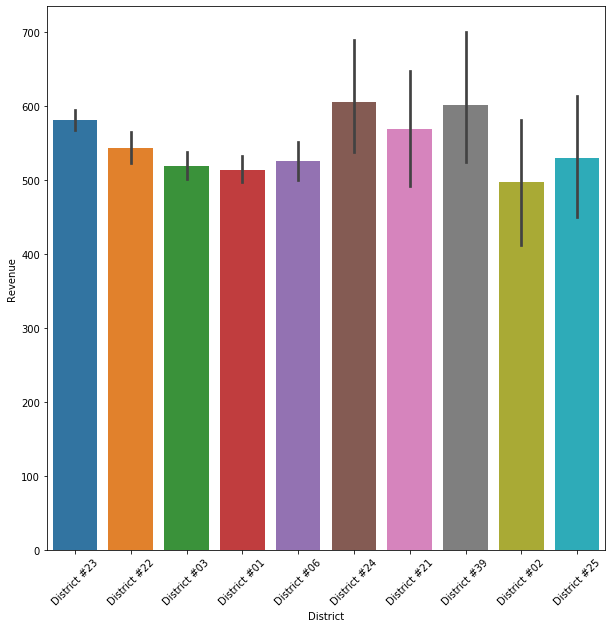

In [15]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['District'],y=df['Revenue'])
plt.xticks(rotation=45)
plt.show()

Which of the cities have the most sales and which of them have the least sales?

In [16]:
df['City'].count()

5518

In [17]:
# plt.figure(figsize=(20,10))
# sns.barplot(x=df['City'],y=df['Revenue'])
# plt.xticks(rotation=45)
# plt.show()

In [18]:
sales = df[['City','Revenue']]

In [19]:
sales

,City,Revenue
0,Austin,834.4875
1,Denton,629.9475
2,Odessa,766.2375
3,Massapequa,577.4475
4,Buda,656.1975
...,...,...
5513,Alpine,293.9475
5514,Lancaster,330.6975
5515,Lockport,330.6975
5516,Niagara Falls,293.9475


In [20]:
sales.sort_values(by=['Revenue'],axis=0)

,City,Revenue
1103,Delhi,56.6475
3482,Rochester,56.6475
3481,Rochester,56.6475
4388,Paris,56.6475
4387,Paris,56.6475
...,...,...
424,Conroe,2677.3425
2406,West Hempstead,3199.3500
2764,El Paso,3934.3500
2355,Lubbock,5354.6850


How are the product categories performing overall in his districts?

In [21]:
df['Category'].value_counts()

Urban    4648
Rural     497
Mix       364
Youth       9
Name: Category, dtype: int64

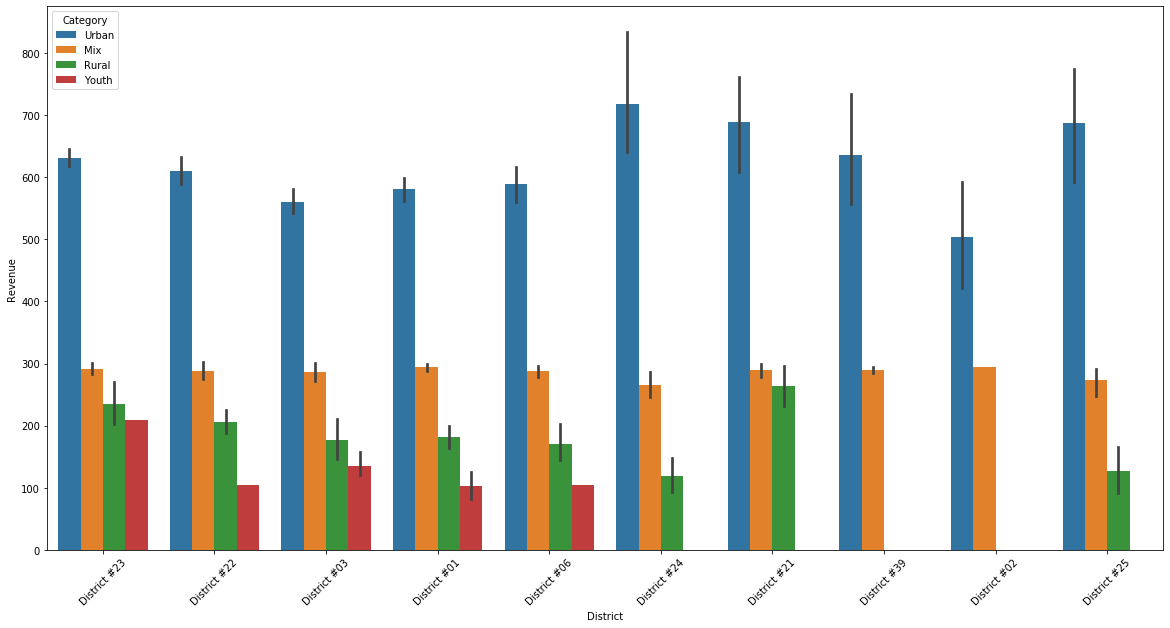

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['District'],y=df['Revenue'],hue=df['Category'])
plt.xticks(rotation=45)
plt.show()